In [1]:
cols = ['ID','CreditLimit','Gender','Education','MaritalStatus','Age',
        'RepayStatSep','RepayStatAug','RepayStatJul','RepayStatJun','RepayStatMay','RepayStatApr',
        'BillSep','BillAug','BillJul','BillJun','BillMay','BillApr',
        'PaymentSep','PaymentAug','PaymentJul','PaymentJun','PaymentMay','PaymentApr',
        'Default']

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score

# Import the necessary functions
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [3]:
from sklearn.metrics import fbeta_score, make_scorer

scorer = make_scorer(score_func=f1_score,greater_is_better=True)

In [4]:
def print_metrics(y_true, y_pred):
    print("Precision Score: {}".format(precision_score(y_true, y_pred)))
    print("Recall Score: {}".format(recall_score(y_true, y_pred)))
    print("Accuracy Score: {}".format(accuracy_score(y_true, y_pred)))
    print("F1 Score: {}".format(f1_score(y_true, y_pred)))
    print("AUC Score: {}".format(roc_auc_score(y_true, y_pred)))

In [5]:
df = pd.read_csv('working_data.csv')

In [6]:
df.head()

,Unnamed: 0,ID,CreditLimit,Age,RepayStatApr,RepayStatMay,RepayStatJun,RepayStatJul,RepayStatAug,RepayStatSep,...,average_bill_paid/credit_limit,Gender_female,Gender_male,Education_graduate school,Education_high school,Education_others,Education_university,MaritalStatus_married,MaritalStatus_others,MaritalStatus_single
0,0,1,20000,24,2,2,-1,-1,-2,-2,...,0.574167,1,0,0,0,0,1,1,0,0
1,1,2,120000,26,-1,2,0,0,0,2,...,0.694444,1,0,0,0,0,1,0,0,1
2,2,3,90000,34,0,0,0,0,0,0,...,2.040370,1,0,0,0,0,1,0,0,1
3,3,4,50000,37,0,0,0,0,0,0,...,2.796000,1,0,0,0,0,1,1,0,0
4,4,5,50000,57,-1,0,-1,0,0,0,...,19.683000,0,1,0,0,0,1,1,0,0


In [7]:
y = df['Default']
X = df.drop(columns='Default', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=123)

In [8]:
scale = StandardScaler()
scale.fit(X_train)

X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [10]:
probs = knn.predict(X_test_scaled)

In [11]:
roc_auc_score(y_test, probs)

0.5970445788242038

In [12]:
print_metrics(y_test, probs)

Precision Score: 0.36348684210526316
Recall Score: 0.36468646864686466
Accuracy Score: 0.7314315533136198
F1 Score: 0.3640856672158155
AUC Score: 0.5970445788242038


0.5970445788242038

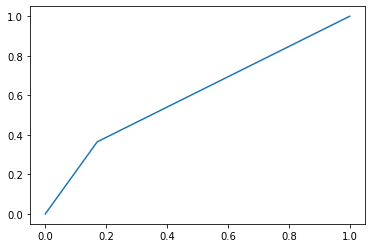

In [13]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
plt.plot(false_positive_rate,true_positive_rate)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# Grid Search

In [14]:
test_tree = KNeighborsClassifier()

param_grid = {'n_neighbors':[10,11,12,13,14,15,16,17,18],
              'leaf_size' : [5,10,15,20,25,30,35]   
                }

gs_knc = GridSearchCV(test_tree, param_grid, cv=5, scoring=scorer)
gs_knc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [5, 10, 15, 20, 25, 30, 35],
                         'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score), verbose=0)

In [15]:
gs_knc.best_params_

{'leaf_size': 5, 'n_neighbors': 11}

In [16]:
gs_knc.best_index_

1

In [17]:
cvs = pd.DataFrame(gs_knc.cv_results_)
cvs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.081196,0.013254,1.299459,0.042756,5,10,"{'leaf_size': 5, 'n_neighbors': 10}",0.157676,0.137417,0.145121,0.135621,0.158285,0.146825,0.009654,36
1,0.071979,0.004927,1.345505,0.049931,5,11,"{'leaf_size': 5, 'n_neighbors': 11}",0.196594,0.205364,0.197531,0.181402,0.200000,0.196179,0.007991,1
2,0.086412,0.006350,1.497376,0.131270,5,12,"{'leaf_size': 5, 'n_neighbors': 12}",0.151793,0.152047,0.148210,0.139419,0.151540,0.148602,0.004799,29
3,0.101415,0.037195,1.827707,0.256471,5,13,"{'leaf_size': 5, 'n_neighbors': 13}",0.188198,0.183399,0.178824,0.183088,0.186813,0.184065,0.003271,8
4,0.082089,0.010309,1.526967,0.053767,5,14,"{'leaf_size': 5, 'n_neighbors': 14}",0.148523,0.149204,0.140559,0.134551,0.146835,0.143935,0.005598,43


In [18]:
best_model = KNeighborsClassifier(leaf_size = 5, n_neighbors = 11)
best_model.fit(X_train_scaled, y_train)
best_probs = best_model.predict(X_test_scaled)

In [19]:
print_metrics(y_test, best_probs)

Precision Score: 0.6
Recall Score: 0.29455445544554454
Accuracy Score: 0.8098799791268046
F1 Score: 0.39513004980630884
AUC Score: 0.6210484421816659


0.5970445788242038

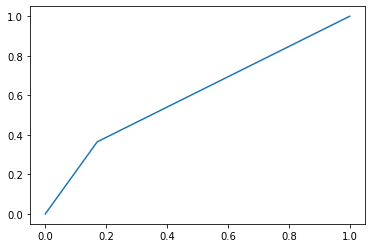

In [20]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)
plt.plot(false_positive_rate,true_positive_rate)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc